In [1]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
from matplotlib import pyplot
import warnings
import matplotlib.pyplot as plt
import pandas_profiling as pp
from statsmodels.tsa.stattools import adfuller
from math import exp
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from matplotlib.pylab import rcParams

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = 'plotly_white'

# Preferred settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
#Import CO2 emissions data - OWID
data = pd.read_csv('../Data/owid-co2-data.csv')
df = data

#Observe data shape and head
print(df.shape)
df.head()

(25204, 58)


,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.0,0.015,0.0,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,0.0,0.099,0.0,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,0.0,0.191,0.0,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,0.0,0.282,0.0,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,0.0,0.388,0.0,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [66]:
df.sample(10)

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,share_global_cement_co2,share_global_coal_co2,share_global_oil_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_oil_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_oil_co2,population,gdp,primary_energy_consumption,energy_per_capita
4988,COG,Congo,2010,1.962,13.78,0.238,0.459,0.01,46.236,0.00,0.079,0.100,NaN,0.031,1.737,0.007,NaN,0.406,0.00,NaN,0.02,0.729,NaN,38.672,0.00,NaN,0.01,4273738.0,2.480904e+10,19.527,4568.809
9906,GRD,Grenada,1969,0.048,18.18,0.007,0.503,0.00,0.392,0.00,NaN,NaN,NaN,NaN,0.048,NaN,NaN,0.503,NaN,NaN,0.00,NaN,NaN,0.392,NaN,NaN,0.00,94723.0,NaN,NaN,NaN
6192,DOM,Dominican Republic,1991,9.538,6.74,0.602,1.312,0.04,175.568,0.02,0.333,0.243,0.150,0.532,8.856,0.073,0.021,1.218,0.10,0.00,0.09,11.779,1.902,161.888,0.09,0.00,0.06,7270413.0,2.862448e+10,39.205,5392.744
22524,TGO,Togo,1990,0.978,-4.54,-0.047,0.259,0.00,15.481,0.00,0.206,0.366,NaN,0.402,0.575,0.107,NaN,0.152,0.08,NaN,0.01,3.338,NaN,12.142,0.03,NaN,0.00,3774310.0,4.744275e+09,2.675,708.686
18449,PRI,Puerto Rico,1951,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2193616.0,7.856025e+09,NaN,NaN
14275,MRT,Mauritania,1964,0.117,33.33,0.029,0.122,0.00,0.385,0.00,0.082,NaN,NaN,NaN,0.117,NaN,NaN,0.122,NaN,NaN,0.00,NaN,NaN,0.385,NaN,NaN,0.00,956794.0,1.423024e+09,NaN,NaN
18947,RUS,Russia,1952,480.735,7.08,31.805,4.537,7.44,7594.135,3.12,NaN,NaN,378.113,4.292,89.596,0.040,3.568,0.846,5.32,9.43,4.87,36.994,5673.907,1810.258,3.51,2.77,5.84,105967087.0,NaN,NaN,NaN
3865,BDI,Burundi,1978,0.103,3.70,0.004,0.026,0.00,1.354,0.00,0.025,NaN,0.004,NaN,0.099,NaN,0.001,0.025,NaN,0.00,0.00,NaN,0.010,1.345,NaN,0.00,0.00,3949264.0,4.095033e+09,NaN,NaN
22996,TUR,Turkey,2018,419.437,-1.39,-5.892,5.094,1.14,10047.649,0.62,0.253,0.240,163.326,37.026,116.186,0.450,1.984,1.411,2.36,1.11,0.95,781.922,4140.051,3506.749,1.96,0.54,0.62,82340090.0,1.655984e+12,1746.959,21216.411
23518,ARE,United Arab Emirates,1963,0.022,20.00,0.004,0.176,0.00,0.073,0.00,0.004,NaN,NaN,NaN,0.022,NaN,NaN,0.176,NaN,NaN,0.00,NaN,NaN,0.073,NaN,NaN,0.00,125130.0,4.936304e+09,NaN,NaN


In [60]:
df.tail()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,share_global_cement_co2,share_global_coal_co2,share_global_oil_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_oil_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_oil_co2,population,gdp,primary_energy_consumption,energy_per_capita
25199,ZWE,Zimbabwe,2016,10.738,-12.17,-1.488,0.765,0.03,736.467,0.05,0.512,0.226,6.959,0.639,3.139,0.046,0.496,0.224,0.04,0.05,0.03,18.188,585.104,133.175,0.05,0.08,0.02,14030338.0,2.096179e+10,47.5,3385.574
25200,ZWE,Zimbabwe,2017,9.582,-10.77,-1.156,0.673,0.03,746.049,0.05,0.437,NaN,5.665,0.678,3.239,0.048,0.398,0.228,0.05,0.04,0.03,18.866,590.768,136.414,0.05,0.08,0.02,14236599.0,2.194784e+10,NaN,NaN
25201,ZWE,Zimbabwe,2018,11.854,23.72,2.273,0.821,0.03,757.903,0.05,0.522,NaN,7.101,0.697,4.056,0.048,0.492,0.281,0.04,0.05,0.03,19.564,597.869,140.470,0.05,0.08,0.02,14438812.0,2.271535e+10,NaN,NaN
25202,ZWE,Zimbabwe,2019,10.949,-7.64,-0.905,0.748,0.03,768.852,0.05,NaN,NaN,6.020,0.697,4.232,0.048,0.411,0.289,0.04,0.04,0.03,20.261,603.889,144.702,0.05,0.08,0.02,14645473.0,NaN,NaN,NaN
25203,ZWE,Zimbabwe,2020,10.531,-3.82,-0.418,0.709,0.03,779.383,0.05,NaN,NaN,6.257,0.697,3.576,0.047,0.421,0.241,0.04,0.04,0.03,20.959,610.146,148.279,0.05,0.08,0.03,14862927.0,NaN,NaN,NaN


In [4]:
df.describe()

,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,25204.000000,23949.000000,3976.000000,24931.000000,23585.000000,3976.000000,23307.000000,3976.000000,23949.000000,2.394900e+04,23949.000000,15389.000000,3761.000000,9141.000000,17188.000000,12248.000000,4382.000000,8845.000000,20539.000000,1999.000000,12218.000000,16860.000000,4381.000000,8835.000000,20181.000000,1999.000000,3976.000000,12248.000000,17188.00000,4382.000000,8845.000000,20539.000000,1999.000000,12248.000000,17188.000000,4382.000000,8845.000000,20539.000000,1999.000000,12248.000000,17188.000000,4382.000000,8845.000000,20539.000000,1999.000000,5208.000000,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,2.287800e+04,1.353800e+04,8690.000000,8681.000000,6803.000000
mean,1953.225797,267.861942,916.755170,21.098600,5.146889,-2.415624,4.170811,6.567721,4.983979,1.035710e+04,5.126531,0.421795,0.370038,0.238931,175.358171,12.888607,15.000326,108.750774,106.254381,15.753891,0.113037,1.551520,0.875319,1.413336,2.635498,0.080168,22.961190,4.419452,6.98983,5.861506,5.405564,2.993497,14.295183,307.761167,8791.767180,425.698588,2587.096729,3296.584230,293.588436,4.462228,7.211834,5.621670,5.242400,3.001620,13.403622,441.481429,8.099506,82.253370,2.046923,29.308135,0.606690,7.072322e+07,2.877088e+11,1569.083895,25568.487454,1.850291
std,53.791369,1521.680894,3373.348275,702.565991,55.259760,182.444942,14.912201,6.927957,17.704994,6.120603e+04,18.480079,0.483864,0.265374,0.233550,786.106838,77.258563,40.471977,441.064563,602.683622,39.385589,0.148907,2.552112,5.477923,3.654290,15.129275,0.055779,45.055039,15.950613,20.76197,14.874259,18.408881,12.018682,28.570911,1706.159528,39131.720328,1320.911296,12347.690600,21645.263301,777.706862,15.685264,21.636504,15.021334,18.926934,12.134102,27.019447,3089.039496,9.387477,566.702756,3.534126,199.291118,0.844671,3.795858e+08,2.180094e+12,9066.102799,33319.956208,1.575161
min,1750.000000,0.000000,0.197000,-99.640000,-1895.244000,-1657.998000,0.000000,0.055000,0.000000,0.000000e+00,0.000000,0.000000,0.006000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-96.760000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-85.620000,-50.487000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.050000
25%,1925.000000,0.528000,10.319750,-0.450000,-0.011000,-0.892500,0.253000,1.240250,0.010000,6.992000e+00,0.000000,0.140000,0.216000,0.178000,0.322000,0.129000,0.253250,0.385000,0.311000,0.747500,0.020000,0.054000,0.021000,0.031000,0.121000,0.036000,-1.757500,0.050000,0.01000,0.090000,0.030000,0.010000,0.300000,1.613000,5.516250,4.071250,3.239000,3.921000,7.709000,0.040000,0.000000,0.060000,0.010000,0.010000,0.190000,8.162500,2.514000,2.150000,0.715000,0.535000,0.228000,1.291899e+06,9.828867e+09,6.997000,3270.369000,0.856000
50%,1967.00

## Data Cleaning

In [5]:
# Only include data from 1950 and later
df = df[df['year']>=1950]

# Observe new df shape
df.shape

(16176, 58)

We check the data-type of each column is of preferred data type

In [6]:
df.dtypes

iso_code                                object
country                                 object
year                                     int64
co2                                    float64
consumption_co2                        float64
co2_growth_prct                        float64
co2_growth_abs                         float64
trade_co2                              float64
co2_per_capita                         float64
consumption_co2_per_capita             float64
share_global_co2                       float64
cumulative_co2                         float64
share_global_cumulative_co2            float64
co2_per_gdp                            float64
consumption_co2_per_gdp                float64
co2_per_unit_energy                    float64
coal_co2                               float64
cement_co2                             float64
flaring_co2                            float64
gas_co2                                float64
oil_co2                                float64
other_industr

In order to carry out accurate pre-processing we have to first find out the number of Null Values in each column.

In [7]:
#check null values
print(df.isna().sum())
print(df.shape)

iso_code                                1584
country                                    0
year                                       0
co2                                      560
consumption_co2                        12200
co2_growth_prct                          148
co2_growth_abs                           687
trade_co2                              12200
co2_per_capita                           828
consumption_co2_per_capita             12200
share_global_co2                         560
cumulative_co2                           560
share_global_cumulative_co2              560
co2_per_gdp                             4786
consumption_co2_per_gdp                12415
co2_per_unit_energy                     7035
coal_co2                                6702
cement_co2                              5965
flaring_co2                            11794
gas_co2                                 8803
oil_co2                                  628
other_industry_co2                     14269
cement_co2

In [47]:
# Drop columns with more than 8K null values (50% of data)
df.dropna(axis=1,thresh=8000, inplace=True)

# Drop continents, identified by lacking an ISO code
df.dropna(axis=0,subset=['iso_code'],inplace=True)

# Drop "World" entries
df = df[df.country != 'World']

# Observe new df shape
df.shape
print(df.dtypes)

iso_code                               object
country                                object
year                                    int64
co2                                   float64
co2_growth_prct                       float64
co2_growth_abs                        float64
co2_per_capita                        float64
share_global_co2                      float64
cumulative_co2                        float64
share_global_cumulative_co2           float64
co2_per_gdp                           float64
co2_per_unit_energy                   float64
coal_co2                              float64
cement_co2                            float64
oil_co2                               float64
cement_co2_per_capita                 float64
coal_co2_per_capita                   float64
oil_co2_per_capita                    float64
share_global_cement_co2               float64
share_global_coal_co2                 float64
share_global_oil_co2                  float64
cumulative_cement_co2             

## Exploratory Data Analysis

### Comparative Analysis 

In [9]:
#use pandas profiling for quick EDA 
profile = pp.ProfileReport(df)

#observe report
#profile

### Top 50 CO2 Emitters

We first visualize the top 50 countries responsible for highest emissions in order to understand where India stands

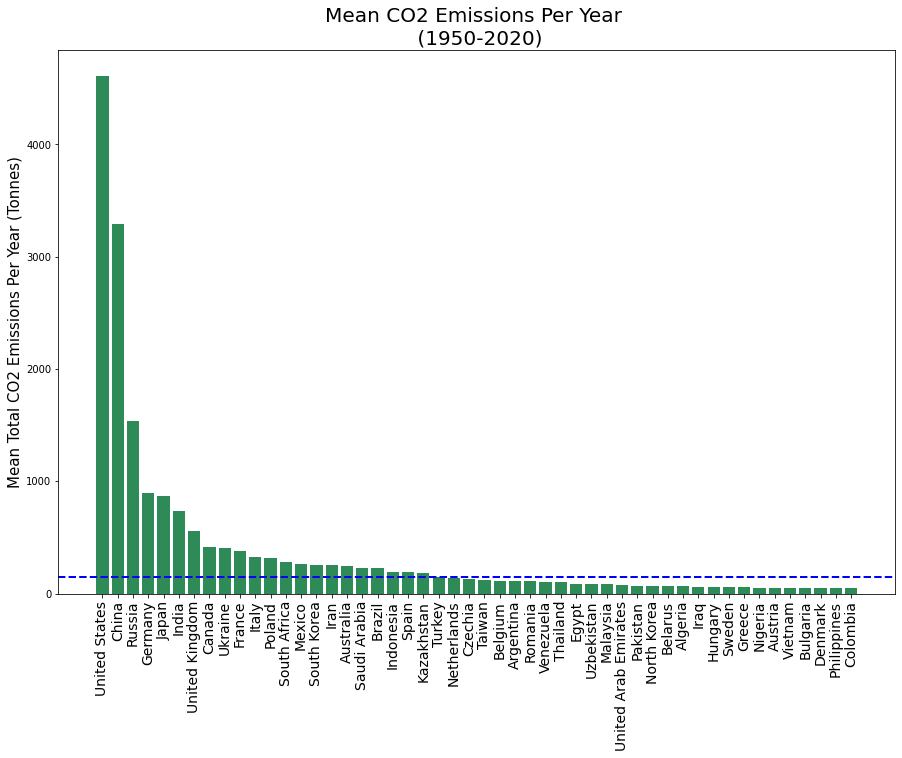

In [84]:
#visualize top 50 total co2 emitting coutries
top50 = df.groupby(['country'])['co2'].mean().sort_values(ascending=False).index[:50]
height = df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50]

%matplotlib inline
#observe graph
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x=top50, height=height, color='seagreen')
plt.title("Mean CO2 Emissions Per Year \n (1950-2020)", fontsize=20)
plt.ylabel('Mean Total CO2 Emissions Per Year (Tonnes)', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_rotation('vertical')

#Threshold to indicate countries above 150 mean tonnes
threshold = 150
plt.axhline(y=threshold, linewidth=2, linestyle='dashed', color='blue')
plt.show()
#uncomment below line to save image
#plt.savefig("../Results&Figures/mean_emissions_per_year-top50")

We try to under how much does each country contribute to the total CO2 Emissions of the world. This will give use an idea about how skewed the emissions patterns are between the most industrialized and developed countries and the developing/under-developed countries

In [22]:
#how much does each country contribute to the total co2 emissions
country = df.country.unique()
emissionshare = df.groupby(['country'])['share_global_co2'].mean()

#visualize top CO2 contributors
fig = px.pie(df, values=emissionshare, names=country, title= 'CO2 Emissions by Country')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

#Uncomment below line to save image
fig.write_html("../Results&Figures/CO2-emissions-contribution.html")

Though India stands 6th highest mean emitting nation, but 7th in share to global emissions. This shows the importance of per capita emissions of the nation. 

Per capita emissions gives idea about the carbon emissions by the population of the country. It also gives idea about the intensity of emissions by a country regardless of its population

### Top Per Capita Co2 Emitting Countries 

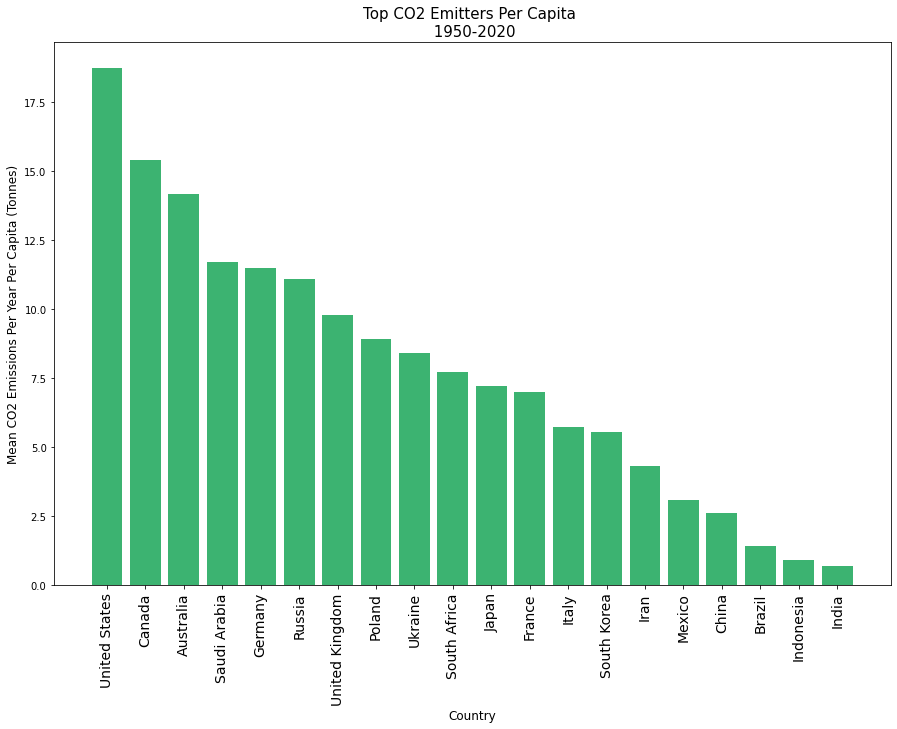

In [83]:
#Find Top 15 Per Capita CO2 Emitting Countries 
#countries that emit more than an average of 150 tonnes per year per capita

#create list
topco2 = list(df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:20].index)
df_topco2 = df.loc[df['country'].isin(topco2)]
top_percapita = list(df_topco2.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False)[:20].index)

#observe plot
df_top = df.loc[df['country'].isin(top_percapita)]
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x = top_percapita, 
        height = df_top.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False),
       color = 'mediumseagreen'
       )

plt.title('Top CO2 Emitters Per Capita \n 1950-2020', fontsize=15)
plt.ylabel('Mean CO2 Emissions Per Year Per Capita (Tonnes)', fontsize=12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_rotation('vertical')
plt.xlabel('Country', fontsize=12)
plt.show()

It is very interesting and surprising to find that India's Per Capita emissions stands 20th inspite of being 6th highest mean emitter and 7th highest contibutor to global share of co2 emission. 

This finding reveals that the intensity of emissions is very very less compared to other developed/developing/under-developed countries. The high figures of mean emissions and contributions can be attributed to the huge population explosion factor of the country, where the emissions per capita is very less.

China being the 2nd highest contributor with 12%+ to global share can be compared to India's per capita emission as both countries share similar per capita figures. we can arrive at a statement that India is not the most intensively emitting country

### Top Per GDP Co2 Emitting Countries 


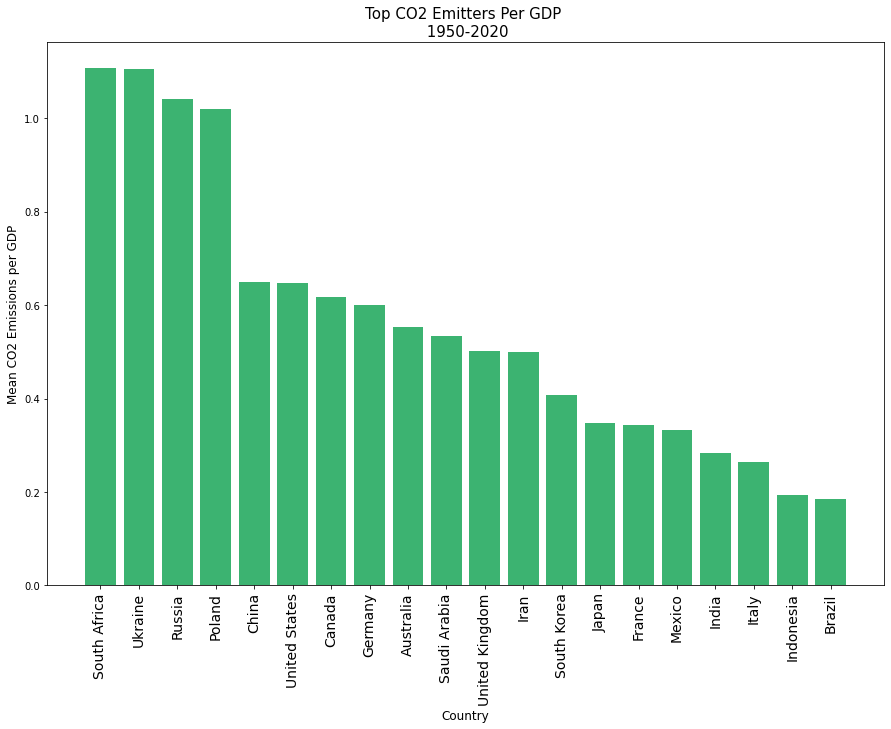

In [82]:
#Find TopPer gdp CO2 Emitting Countries 
#countries that emit more than an average of 150 tonnes per year per GDP growth

#create list
topco2 = list(df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:20].index)
df_topco2 = df.loc[df['country'].isin(topco2)]
top_percapita = list(df_topco2.groupby(['country'])['co2_per_gdp'].mean().sort_values(ascending=False)[:20].index)

#observe plot
df_top = df.loc[df['country'].isin(top_percapita)]
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x = top_percapita, 
        height = df_top.groupby(['country'])['co2_per_gdp'].mean().sort_values(ascending=False),
       color = 'mediumseagreen'
       )

plt.title('Top CO2 Emitters Per GDP \n 1950-2020', fontsize=15)
plt.ylabel('Mean CO2 Emissions per GDP', fontsize=12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_rotation('vertical')
plt.xlabel('Country', fontsize=12)
plt.show()

India being the 6th largest economy emits less than 0.4% carbon per GDP growth. 
This emission ratio to GDP compared to the top 5 largest economies - United States, China, Japan, Germany, United Kingdom is nominally less

### Per Capita Energy Consumption of Top Co2 Emitting Countries 


Energy consumed by a country contributes majorly to the carbon emissions of that country. Energy use not only includes electricity, but also other areas of consumption including transport, heating and cooking. Analyzing the energy consumption per capita of top 50 emitting countries gives an idea about the impact of energy consumption on CO2 emissions 

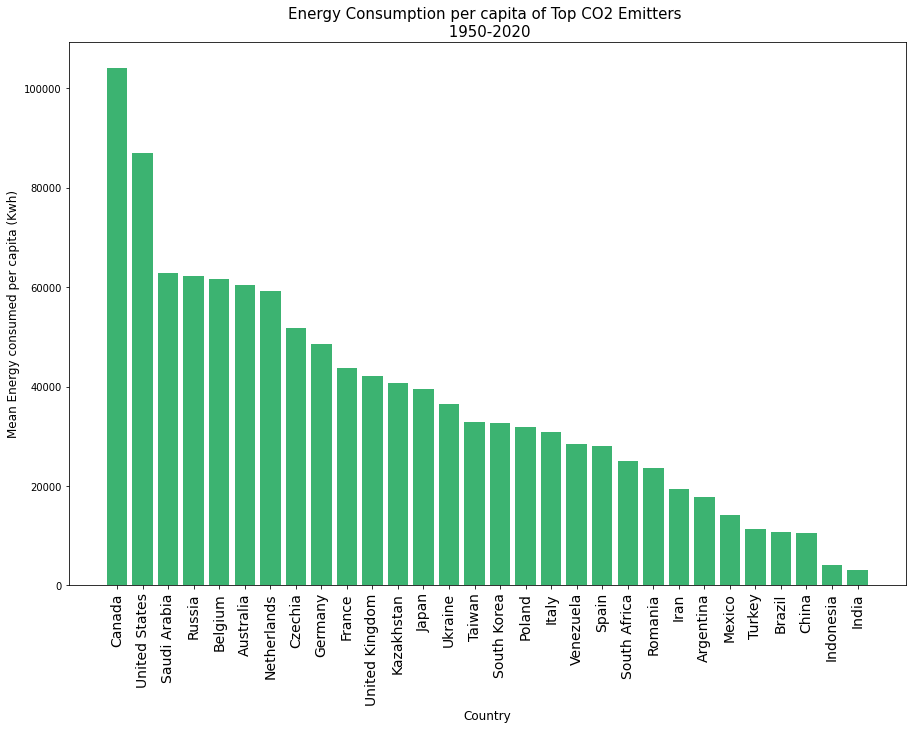

In [81]:
#Find energy consumption of top CO2 Emitting Countries 
#countries energy consumption per capita per year 

#create list
topco2 = list(df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50].index)
df_topco2 = df.loc[df['country'].isin(topco2)]
top_energypercapita = list(df_topco2.groupby(['country'])['energy_per_capita'].mean().sort_values(ascending=False)[:50].index)

#observe plot
df_top = df.loc[df['country'].isin(top_percapita)]
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x = top_percapita, 
        height = df_top.groupby(['country'])['energy_per_capita'].mean().sort_values(ascending=False),
       color = 'mediumseagreen'
       )

plt.title('Energy Consumption per capita of Top CO2 Emitters \n 1950-2020', fontsize=15)
plt.ylabel('Mean Energy consumed per capita (Kwh)', fontsize=12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_rotation('vertical')
plt.xlabel('Country', fontsize=12)
plt.show()

Per Capita Energy Consumption of India is less (~6000 kwh) compared to other top CO2 emitting countries

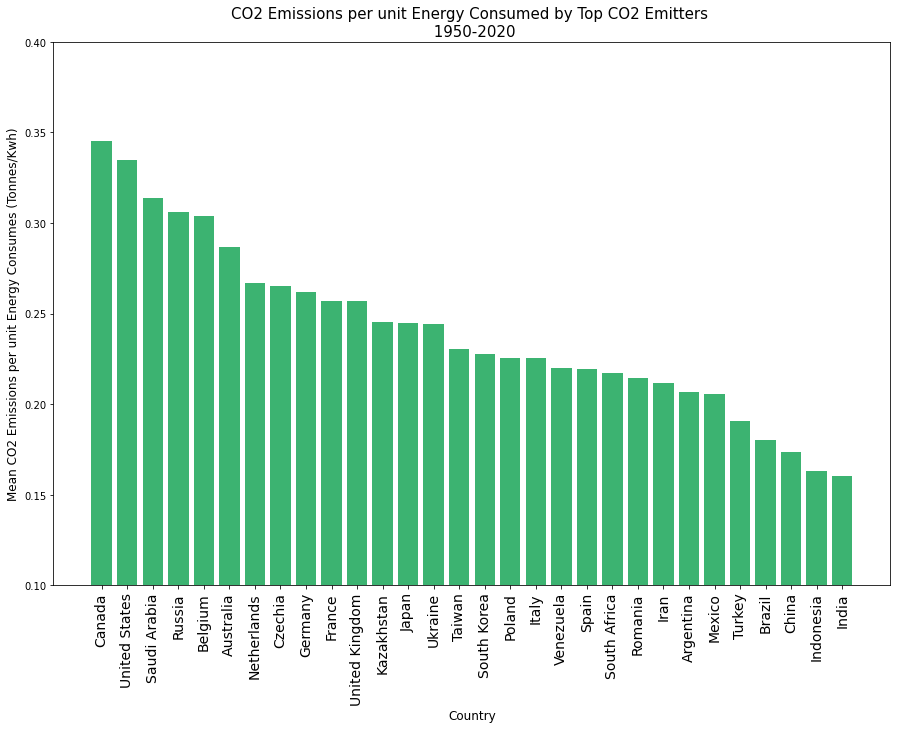

In [80]:
#Find energy consumption of top CO2 Emitting Countries 
#countries energy consumption per capita per year 

#create list
topco2 = list(df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50].index)
df_topco2 = df.loc[df['country'].isin(topco2)]
top_energypercapita = list(df_topco2.groupby(['country'])['co2_per_unit_energy'].mean().sort_values(ascending=False)[:50].index)

#observe plot
df_top = df.loc[df['country'].isin(top_percapita)]
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x = top_percapita, 
        height = df_top.groupby(['country'])['co2_per_unit_energy'].mean().sort_values(ascending=False),
       color = 'mediumseagreen'
       )

plt.title('CO2 Emissions per unit Energy Consumed by Top CO2 Emitters \n 1950-2020', fontsize=15)
plt.ylabel('Mean CO2 Emissions per unit Energy Consumes (Tonnes/Kwh)', fontsize=12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_rotation('vertical')
plt.xlabel('Country', fontsize=12)
plt.ylim([0.10,0.40])
plt.show()

In [14]:
df_india = data[data['country'] == 'India']
df_india = df_india[df_india['year'] >= 1800]
df_india = df_india[['year','co2']]
df_india.set_index('year', inplace=True)

# Convert year to DateTime object
df_india.index = pd.to_datetime(df_india.index,format='%Y')
df_india.sample(5)

,co2
year,
1923-01-01,38.021
1907-01-01,21.800
1859-01-01,0.637
1873-01-01,NaN
1985-01-01,397.953


### Tasks to complete

#### EDA of India

- Analyse historical patterns
- Plot graph indicating major historical events triggering Indian Economy
- Analyse India's energy patterns
- compare India vs World - emission patterns to the indicators - GDP growth, energy consumption